In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [ ]:
Stock = pd.read_csv('/content/drive/MyDrive/archive/AAPL.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


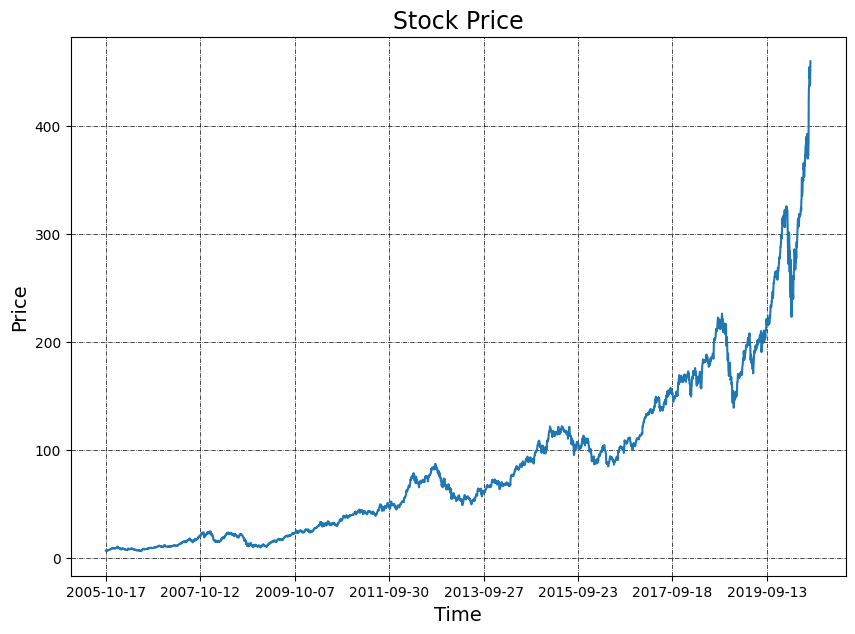

In [ ]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
# remove leading spaces from column names

df_Stock.columns = df_Stock.columns.str.strip()

In [ ]:
df_Stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 2005-10-17 to 2020-08-13
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              3732 non-null   float64
 1   High              3732 non-null   float64
 2   Low               3732 non-null   float64
 3   Close             3732 non-null   float64
 4   Volume            3732 non-null   int64  
 5   SD20              3732 non-null   float64
 6   Upper_Band        3732 non-null   float64
 7   Lower_Band        3732 non-null   float64
 8   S_Close(t-1)      3732 non-null   float64
 9   S_Close(t-2)      3732 non-null   float64
 10  S_Close(t-3)      3732 non-null   float64
 11  S_Close(t-5)      3732 non-null   float64
 12  S_Open(t-1)       3732 non-null   float64
 13  MA5               3732 non-null   float64
 14  MA10              3732 non-null   float64
 15  MA20              3732 non-null   float64
 16  MA50              3732 non-null 

In [ ]:
df_Stock.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 63, dtype: int64

In [ ]:
df_Stock = df_Stock.drop(columns='Date_col')

In [ ]:


# Create input features (X) and target variable (y)
X = df_Stock.drop(['Close_forcast'], axis=1)
y = df_Stock['Close_forcast']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((2985, 61), (747, 61))

feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5)
count,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,...,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03
mean,1.666264e-17,-3.570567e-17,-4.284680e-17,1.428227e-17,-5.950944e-17,4.284680e-17,-1.404423e-16,-4.998793e-17,-1.428227e-17,2.380378e-18,...,2.975472e-17,-1.725774e-16,-1.547245e-16,8.093284e-17,3.641978e-16,4.296582e-16,-2.523200e-16,7.617209e-17,-2.166144e-16,1.999517e-16
std,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,...,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00
min,-1.033204e+00,-1.030390e+00,-1.034065e+00,-1.032692e+00,-1.038060e+00,-7.880062e-01,-1.035786e+00,-1.051898e+00,-1.034595e+00,-1.033276e+00,...,-1.174206e+00,-1.151506e+00,-1.139448e+00,-1.126718e+00,-1.737531e+00,-1.738112e+00,-1.738759e+00,-1.711672e+00,-1.711836e+00,-1.711429e+00
25%,-8.232080e-01,-8.225397e-01,-8.251509e-01,-8.219322e-01,-7.750419e-01,-5.743919e-01,-8.274249e-01,-8.470826e-01,-8.236312e-01,-8.247571e-01,...,-8.397517e-01,-8.406870e-01,-8.432217e-01,-8.449114e-01,-7.906576e-01,-7.930503e-01,-7.917080e-01,-7.903419e-01,-7.928817e-01,-7.942873e-01
50%,-2.482999e-01,-2.505098e-01,-2.505078e-01,-2.507959e-01,-3.029310e-01,-3.045874e-01,-2.401892e-01,-2.439473e-01,-2.500496e-01,-2.508518e-01,...,-4.166011e-01,-4.075178e-01,-4.185499e-01,-4.258773e-01,-3.322319e-01,-3.319559e-01,-3.378853e-01,-2.422282e-01,-2.376251e-01,-2.414983e-01
75%,3.821992e-01,3.743015e-01,3.821529e-01,3.799583e-01,4.645976e-01,1.390715e-01,3.667264e-01,4.385854e-01,3.792703e-01,3.814797e-01,...,4.687407e-01,4.683511e-01,4.700643e-01,4.931748e-01,5.878389e-01,5.886760e-01,5.884350e-01,4.777099e-01,4.855615e-01,4.451752e-01
max,4.721359e+00,4.734502e+00,4.748643e+00,4.735620e+00,6.400263e+00,9.598471e+00,4.731223e+00,3.961845e+00,4.651222e+00,4.698618e+00,...,3.357211e+00,3.275796e+00,3.216158e+00,3.104379e+00,2.427318e+00,2.438217e+00,2.450119e+00,2.396153e+00,2.374810e+00,2.407443e+00


 Run SVM with default hyperparameter

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

# Assuming df_Stock is already prepared and correctly formatted

# Function to create train, validation, and test sets
def create_train_test_set(df_Stock):
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']

    # Normalizing features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Splitting the dataset
    X_train, X_temp, Y_train, Y_temp = train_test_split(features_scaled, target, test_size=0.12, random_state=42)
    X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test, scaler

X_train, X_val, X_test, Y_train, Y_val, Y_test, scaler = create_train_test_set(df_Stock)


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)
print("Y_test shape:", Y_test.shape)



X_train shape: (3284, 61)
X_val shape: (224, 61)
X_test shape: (224, 61)
Y_train shape: (3284,)
Y_val shape: (224,)
Y_test shape: (224,)


neural network model with an RBF activation *function*

Epoch 1/100
66/66 [==============================] - 2s 13ms/step - loss: 12791.1367 - val_loss: 9978.7129
Epoch 2/100
66/66 [==============================] - 0s 7ms/step - loss: 10866.3047 - val_loss: 8515.9756
Epoch 3/100
66/66 [==============================] - 0s 6ms/step - loss: 9477.4180 - val_loss: 7362.4067
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 8371.0596 - val_loss: 6463.5396
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 7457.4951 - val_loss: 5720.5566
Epoch 6/100
66/66 [==============================] - 0s 6ms/step - loss: 6625.6201 - val_loss: 5008.9761
Epoch 7/100
66/66 [==============================] - 1s 8ms/step - loss: 5819.4116 - val_loss: 4349.1201
Epoch 8/100
66/66 [==============================] - 1s 10ms/step - loss: 5048.7295 - val_loss: 3696.9326
Epoch 9/100
66/66 [==============================] - 1s 8ms/step - loss: 4379.7266 - val_loss: 3154.8220
Epoch 10/100
66/66 [==============================]

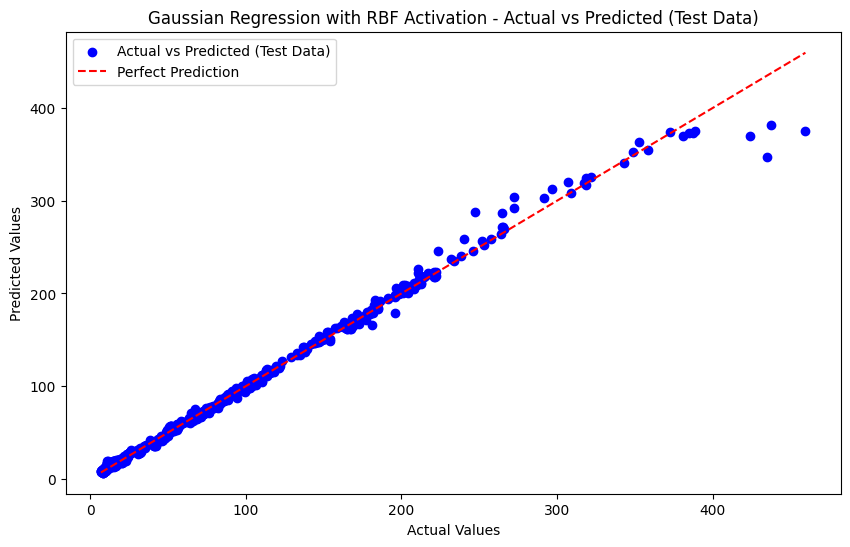

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X_train and Y_train are your training data and labels
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Convert Y_train to a NumPy array and reshape it
Y_train_array = Y_train.values.reshape(-1, 1)
Y_test_array = Y_test.values.reshape(-1, 1)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define RBF activation function
def rbf_activation(x):
    return tf.exp(-tf.square(x))

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    tf.keras.layers.Dense(256, activation=rbf_activation),     # Hidden layer with RBF activation
    tf.keras.layers.Dense(1, activation='linear')              # Output layer with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model to the training data with validation split
history = model.fit(X_train_scaled, Y_train_array, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions on the test data
prediction = model.predict(X_test_scaled)

# Evaluate the mean squared error for regression on test data
mse_test = metrics.mean_squared_error(Y_test_array, prediction)
print('Mean Squared Error for Gaussian Regression with RBF activation on test data is', mse_test)

# Plotting actual vs predicted values on test data
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_array, prediction, color='blue', label='Actual vs Predicted (Test Data)')
plt.plot([min(Y_test_array), max(Y_test_array)], [min(Y_test_array), max(Y_test_array)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Gaussian Regression with RBF Activation - Actual vs Predicted (Test Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score


def evaluate_gvr_model(model, X_train, Y_train_array, X_val, Y_val, X_test, Y_test):
    # Train the model on the combined training and validation sets

    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    Y_test_pred = model.predict(X_test)

    print("Training MSE:", mean_squared_error(Y_train_array, Y_train_pred))
    print("Validation MSE:", mean_squared_error(Y_val, Y_val_pred))
    print("Test MSE:", mean_squared_error(Y_test, Y_test_pred))

    print("Training R-squared:", r2_score(Y_train_array, Y_train_pred))
    print("Validation R-squared:", r2_score(Y_val, Y_val_pred))
    print("Test R-squared:", r2_score(Y_test, Y_test_pred))

# Assuming you have trained your RBF model using the provided code
# rbf_model.fit(X_train, Y_train)

# Evaluate the RBF model
# Correct the typo in the function call
evaluate_gvr_model(model, X_train, Y_train_array, X_val, Y_val, X_test, Y_test)




21/21 [==============================] - 0s 2ms/step
Training MSE: 18.954755452649586
Validation MSE: 28.20181300604853
Test MSE: 48.4541960430248
Training R-squared: 0.9969880257356449
Validation R-squared: 0.9948807579740818
Test R-squared: 0.9926455964258959


In [ ]:
import pandas as pd

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': Y_test_array.flatten(), 'Predicted': prediction.flatten()})

# Display the DataFrame
print(result_df)


     Actual   Predicted
0     83.16   81.827507
1     38.89   38.188992
2     22.88   24.360720
3     63.81   65.438530
4    181.87  179.116776
..      ...         ...
652   23.51   24.151690
653   83.84   83.375412
654    7.42    8.431011
655  144.49  146.805893
656    8.10    9.076915

[657 rows x 2 columns]
